# Avaliação de criptossistemas baseados em códigos no protocolo TLS

This notebook contains the code used to process and plot all the data generated by the benchmark described in the following paper:

Gregorio, P. C. and Goya, D. H.. **Avaliação de criptossistemas baseados em códigos no protocolo TLS**. 2021

The paper repository can be found at [https://github.com/pi-etro/Post-Quantum-TLS-Benchmarking/tree/avaliacao-criptossistemas-baseados-codigos](https://github.com/pi-etro/Post-Quantum-TLS-Benchmarking/tree/avaliacao-criptossistemas-baseados-codigos)

## Imports and configs

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
from shutil import rmtree
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from urllib.request import urlretrieve

In [2]:
# download raw data
urlretrieve("https://github.com/pi-etro/Post-Quantum-TLS-Benchmarking/raw/avaliacao-criptossistemas-baseados-codigos/data_2021_11_18.zip",
            "data.zip")
with ZipFile("data.zip","r") as zip_file: zip_file.extractall()

In [3]:
# folder to save images
if not os.path.exists("imgs"): os.mkdir("imgs")

In [4]:
# pyplot general configs
# use latex font (needs tex installed)
plt.rcParams.update({
    "text.usetex": True,
    'font.size' : 11,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

In [5]:
# list of material colors with 9 levels of saturation
material = {
    "red":         {0: "#ffebee",1: "#ffcdd2",2: "#ef9a9a",3: "#e57373",4: "#ef5350",5: "#f44336",
                    6: "#e53935",7: "#d32f2f",8: "#c62828",9: "#b71c1c",},
    "pink":        {0: "#fce4ec",1: "#f8bbd0",2: "#f48fb1",3: "#f06292",4: "#ec407a",5: "#e91e63",
                    6: "#d81b60",7: "#c2185b",8: "#ad1457",9: "#880e4f",},
    "purple":      {0: "#f3e5f5",1: "#e1bee7",2: "#ce93d8",3: "#ba68c8",4: "#ab47bc",5: "#9c27b0",
                    6: "#8e24aa",7: "#7b1fa2",8: "#6a1b9a",9: "#4a148c",},
    "deep purple": {0: "#ede7f6",1: "#d1c4e9",2: "#b39ddb",3: "#9575cd",4: "#7e57c2",5: "#673ab7",
                    6: "#5e35b1",7: "#512da8",8: "#4527a0",9: "#311b92",},
    "indigo":      {0: "#e8eaf6",1: "#c5cae9",2: "#9fa8da",3: "#7986cb",4: "#5c6bc0",5: "#3f51b5",
                    6: "#3949ab",7: "#303f9f",8: "#283593",9: "#1a237e",},
    "blue":        {0: "#e3f2fd",1: "#bbdefb",2: "#90caf9",3: "#64b5f6",4: "#42a5f5",5: "#2196f3",
                    6: "#1e88e5",7: "#1976d2",8: "#1565c0",9: "#0d47a1",},
    "light blue":  {0: "#e1f5fe",1: "#b3e5fc",2: "#81d4fa",3: "#4fc3f7",4: "#29b6f6",5: "#03a9f4",
                    6: "#039be5",7: "#0288d1",8: "#0277bd",9: "#01579b",},
    "cyan":        {0: "#e0f7fa",1: "#b2ebf2",2: "#80deea",3: "#4dd0e1",4: "#26c6da",5: "#00bcd4",
                    6: "#00acc1",7: "#0097a7",8: "#00838f",9: "#006064",},
    "teal":        {0: "#e0f2f1",1: "#b2dfdb",2: "#80cbc4",3: "#4db6ac",4: "#26a69a",5: "#009688",
                    6: "#00897b",7: "#00796b",8: "#00695c",9: "#004d40",},
    "green":       {0: "#e8f5e9",1: "#c8e6c9",2: "#a5d6a7",3: "#81c784",4: "#66bb6a",5: "#4caf50",
                    6: "#43a047",7: "#388e3c",8: "#2e7d32",9: "#1b5e20",},
    "light green": {0: "#f1f8e9",1: "#dcedc8",2: "#c5e1a5",3: "#aed581",4: "#9ccc65",5: "#8bc34a",
                    6: "#7cb342",7: "#689f38",8: "#558b2f",9: "#33691e",},
    "lime":        {0: "#f9fbe7",1: "#f0f4c3",2: "#e6ee9c",3: "#dce775",4: "#d4e157",5: "#cddc39",
                    6: "#c0ca33",7: "#afb42b",8: "#9e9d24",9: "#827717",},
    "yellow":      {0: "#fffde7",1: "#fff9c4",2: "#fff59d",3: "#fff176",4: "#ffee58",5: "#ffeb3b",
                    6: "#fdd835",7: "#fbc02d",8: "#f9a825",9: "#f57f17",},
    "amber":       {0: "#fff8e1",1: "#ffecb3",2: "#ffe082",3: "#ffd54f",4: "#ffca28",5: "#ffc107",
                    6: "#ffb300",7: "#ffa000",8: "#ff8f00",9: "#ff6f00",},
    "orange":      {0: "#fff3e0",1: "#ffe0b2",2: "#ffcc80",3: "#ffb74d",4: "#ffa726",5: "#ff9800",
                    6: "#fb8c00",7: "#f57c00",8: "#ef6c00",9: "#e65100",},
    "deep orange": {0: "#fbe9e7",1: "#ffccbc",2: "#ffab91",3: "#ff8a65",4: "#ff7043",5: "#ff5722",
                    6: "#f4511e",7: "#e64a19",8: "#d84315",9: "#bf360c",},
    "brown":       {0: "#efebe9",1: "#d7ccc8",2: "#bcaaa4",3: "#a1887f",4: "#8d6e63",5: "#795548",
                    6: "#6d4c41",7: "#5d4037",8: "#4e342e",9: "#3e2723",},
    "grey":        {0: "#fafafa",1: "#f5f5f5",2: "#eeeeee",3: "#e0e0e0",4: "#bdbdbd",5: "#9e9e9e",
                    6: "#757575",7: "#616161",8: "#424242",9: "#212121",},
    "blue grey":   {0: "#eceff1",1: "#cfd8dc",2: "#b0bec5",3: "#90a4ae",4: "#78909c",5: "#607d8b",
                    6: "#546e7a",7: "#455a64",8: "#37474f",9: "#263238",},
}

## Data processing

For ECDH P256, HQC 128 hybrid with ECDH P256, BIKE L1 hybrid with ECDH P256, HQC 128 and BIKE L1 and for every [RTT](https://en.wikipedia.org/wiki/Round-trip_delay) tested:

- import `.csv` file
- calculate the 50th percentile (median)
- calculate the 95th percentile

In [6]:
# round-trip time test set
rtt = [5.704, 31.244, 78.802, 195.820]

# packet loss test set
pkt_loss = [0.0, 0.1, 0.5, 1.0, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0,
            14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

In [7]:
# reading csv files to pandas dataframes
# index_col (line indexes) is the packet loss for that line
# each column is one handshake completion time
# there is 5000 samples for every RTT and packet loss combination

tmp = pd.DataFrame()

# ECDH P256 5.704ms
df_prime256v1_5p704ms = pd.read_csv("data/prime256v1_5p704ms.csv", header=None, index_col=[0])
tmp['median'] = df_prime256v1_5p704ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_prime256v1_5p704ms.quantile(q=0.95, axis=1)
df_prime256v1_5p704ms = tmp.copy()

# ECDH P256 31.244ms
df_prime256v1_31p244ms = pd.read_csv("data/prime256v1_31p244ms.csv", header=None, index_col=[0])
tmp['median'] = df_prime256v1_31p244ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_prime256v1_31p244ms.quantile(q=0.95, axis=1)
df_prime256v1_31p244ms = tmp.copy()

# ECDH P256 78.802ms
df_prime256v1_78p802ms = pd.read_csv("data/prime256v1_78p802ms.csv", header=None, index_col=[0])
tmp['median'] = df_prime256v1_78p802ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_prime256v1_78p802ms.quantile(q=0.95, axis=1)
df_prime256v1_78p802ms = tmp.copy()

# ECDH P256 195.820ms
df_prime256v1_195p820ms = pd.read_csv("data/prime256v1_195p820ms.csv", header=None, index_col=[0])
tmp['median'] = df_prime256v1_195p820ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_prime256v1_195p820ms.quantile(q=0.95, axis=1)
df_prime256v1_195p820ms = tmp.copy()

In [8]:
# HQC 128 hybrid with ECDH P256 5.704ms
df_p256_hqc128_5p704ms = pd.read_csv("data/p256_hqc128_5p704ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_hqc128_5p704ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_hqc128_5p704ms.quantile(q=0.95, axis=1)
df_p256_hqc128_5p704ms = tmp.copy()

# HQC 128 hybrid with ECDH P256 31.244ms
df_p256_hqc128_31p244ms = pd.read_csv("data/p256_hqc128_31p244ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_hqc128_31p244ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_hqc128_31p244ms.quantile(q=0.95, axis=1)
df_p256_hqc128_31p244ms = tmp.copy()

# HQC 128 hybrid with ECDH P256 78.802ms
df_p256_hqc128_78p802ms = pd.read_csv("data/p256_hqc128_78p802ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_hqc128_78p802ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_hqc128_78p802ms.quantile(q=0.95, axis=1)
df_p256_hqc128_78p802ms = tmp.copy()

# HQC 128 hybrid with ECDH P256 195.820ms
df_p256_hqc128_195p820ms = pd.read_csv("data/p256_hqc128_195p820ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_hqc128_195p820ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_hqc128_195p820ms.quantile(q=0.95, axis=1)
df_p256_hqc128_195p820ms = tmp.copy()

In [9]:
# BIKE L1 hybrid with ECDH P256 5.704ms
df_p256_bikel1_5p704ms = pd.read_csv("data/p256_bikel1_5p704ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_bikel1_5p704ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_bikel1_5p704ms.quantile(q=0.95, axis=1)
df_p256_bikel1_5p704ms = tmp.copy()

# BIKE L1 hybrid with ECDH P256 31.244ms
df_p256_bikel1_31p244ms = pd.read_csv("data/p256_bikel1_31p244ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_bikel1_31p244ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_bikel1_31p244ms.quantile(q=0.95, axis=1)
df_p256_bikel1_31p244ms = tmp.copy()

# BIKE L1 hybrid with ECDH P256 78.802ms
df_p256_bikel1_78p802ms = pd.read_csv("data/p256_bikel1_78p802ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_bikel1_78p802ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_bikel1_78p802ms.quantile(q=0.95, axis=1)
df_p256_bikel1_78p802ms = tmp.copy()

# BIKE L1 hybrid with ECDH P256 195.820ms
df_p256_bikel1_195p820ms = pd.read_csv("data/p256_bikel1_195p820ms.csv", header=None, index_col=[0])
tmp['median'] = df_p256_bikel1_195p820ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_p256_bikel1_195p820ms.quantile(q=0.95, axis=1)
df_p256_bikel1_195p820ms = tmp.copy()

In [10]:
# HQC 128 5.704ms
df_hqc128_5p704ms = pd.read_csv("data/hqc128_5p704ms.csv", header=None, index_col=[0])
tmp['median'] = df_hqc128_5p704ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_hqc128_5p704ms.quantile(q=0.95, axis=1)
df_hqc128_5p704ms = tmp.copy()

# HQC 128 31.244ms
df_hqc128_31p244ms = pd.read_csv("data/hqc128_31p244ms.csv", header=None, index_col=[0])
tmp['median'] = df_hqc128_31p244ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_hqc128_31p244ms.quantile(q=0.95, axis=1)
df_hqc128_31p244ms = tmp.copy()

# HQC 128 78.802ms
df_hqc128_78p802ms = pd.read_csv("data/hqc128_78p802ms.csv", header=None, index_col=[0])
tmp['median'] = df_hqc128_78p802ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_hqc128_78p802ms.quantile(q=0.95, axis=1)
df_hqc128_78p802ms = tmp.copy()

# HQC 128 195.820ms
df_hqc128_195p820ms = pd.read_csv("data/hqc128_195p820ms.csv", header=None, index_col=[0])
tmp['median'] = df_hqc128_195p820ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_hqc128_195p820ms.quantile(q=0.95, axis=1)
df_hqc128_195p820ms = tmp.copy()

In [11]:
# BIKE L1 5.704ms
df_bikel1_5p704ms = pd.read_csv("data/bikel1_5p704ms.csv", header=None, index_col=[0])
tmp['median'] = df_bikel1_5p704ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_bikel1_5p704ms.quantile(q=0.95, axis=1)
df_bikel1_5p704ms = tmp.copy()

# BIKE L1 31.244ms
df_bikel1_31p244ms = pd.read_csv("data/bikel1_31p244ms.csv", header=None, index_col=[0])
tmp['median'] = df_bikel1_31p244ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_bikel1_31p244ms.quantile(q=0.95, axis=1)
df_bikel1_31p244ms = tmp.copy()

# BIKE L1 78.802ms
df_bikel1_78p802ms = pd.read_csv("data/bikel1_78p802ms.csv", header=None, index_col=[0])
tmp['median'] = df_bikel1_78p802ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_bikel1_78p802ms.quantile(q=0.95, axis=1)
df_bikel1_78p802ms = tmp.copy()

# BIKE L1 195.820ms
df_bikel1_195p820ms = pd.read_csv("data/bikel1_195p820ms.csv", header=None, index_col=[0])
tmp['median'] = df_bikel1_195p820ms.quantile(q=0.5, axis=1)
tmp['95_percentile'] = df_bikel1_195p820ms.quantile(q=0.95, axis=1)
df_bikel1_195p820ms = tmp.copy()

## Data plot

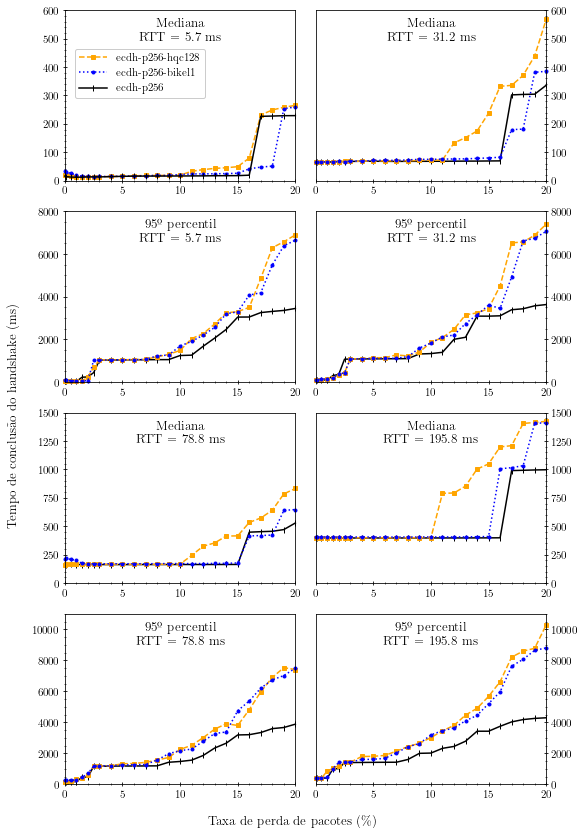

In [12]:
fig, axs = plt.subplots(4, 2,)

fig.supxlabel('Taxa de perda de pacotes (\%)')
fig.supylabel('Tempo de conclusão do handshake (ms)')

fig.set_size_inches(8.27, 11.69)

# median 5.704ms
axs[0, 0].set_title('Mediana\nRTT = 5.7 ms', y=1.0, pad=-30)
axs[0, 0].set_ylim([0, 600])
axs[0, 0].set_xticks([0, 5, 10, 15, 20])
axs[0, 0].minorticks_on()
axs[0, 0].tick_params('both', direction="inout", which='major')
axs[0, 0].tick_params('both', direction="inout", which='minor')
axs[0, 0].margins(x=0)

axs[0, 0].plot(df_p256_hqc128_5p704ms.index, df_p256_hqc128_5p704ms["median"], '--s',
               color="orange", label="ecdh-p256-hqc128", clip_on=False, markersize=3.5)
axs[0, 0].plot(df_p256_bikel1_5p704ms.index, df_p256_bikel1_5p704ms["median"], ':.',
               color="blue", label="ecdh-p256-bikel1", clip_on=False)
axs[0, 0].plot(df_prime256v1_5p704ms.index, df_prime256v1_5p704ms["median"], '-|',
               color="black", label="ecdh-p256", clip_on=False)

# median 31.244ms
axs[0, 1].set_title('Mediana\nRTT = 31.2 ms', y=1.0, pad=-30)
axs[0, 1].set_ylim([0, 600])
axs[0, 1].set_xticks([0, 5, 10, 15, 20])
axs[0, 1].minorticks_on()
axs[0, 1].tick_params('both', direction="inout", which='major')
axs[0, 1].tick_params('both', direction="inout", which='minor')
axs[0, 1].margins(x=0)

axs[0, 1].yaxis.set_label_position("right")
axs[0, 1].yaxis.tick_right()

axs[0, 1].plot(df_prime256v1_31p244ms.index, df_prime256v1_31p244ms["median"], '-|',
               color="black", clip_on=False)
axs[0, 1].plot(df_p256_hqc128_31p244ms.index, df_p256_hqc128_31p244ms["median"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[0, 1].plot(df_p256_bikel1_31p244ms.index, df_p256_bikel1_31p244ms["median"], ':.',
               color="blue", clip_on=False)

# 95th percentile 5.704ms
axs[1, 0].set_title('95º percentil\nRTT = 5.7 ms', y=1.0, pad=-30)
axs[1, 0].set_ylim([0, 8000])
axs[1, 0].set_xticks([0, 5, 10, 15, 20])
axs[1, 0].minorticks_on()
axs[1, 0].tick_params('both', direction="inout", which='major')
axs[1, 0].tick_params('both', direction="inout", which='minor')
axs[1, 0].margins(x=0)

axs[1, 0].plot(df_prime256v1_5p704ms.index, df_prime256v1_5p704ms["95_percentile"], '-|',
               color="black", clip_on=False)
axs[1, 0].plot(df_p256_hqc128_5p704ms.index, df_p256_hqc128_5p704ms["95_percentile"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[1, 0].plot(df_p256_bikel1_5p704ms.index, df_p256_bikel1_5p704ms["95_percentile"], ':.',
               color="blue", clip_on=False)

# 95th percentile 31.244ms
axs[1, 1].set_title('95º percentil\nRTT = 31.2 ms', y=1.0, pad=-30)
axs[1, 1].set_ylim([0, 8000])
axs[1, 1].set_xticks([0, 5, 10, 15, 20])
axs[1, 1].minorticks_on()
axs[1, 1].tick_params('both', direction="inout", which='major')
axs[1, 1].tick_params('both', direction="inout", which='minor')
axs[1, 1].margins(x=0)

axs[1, 1].yaxis.set_label_position("right")
axs[1, 1].yaxis.tick_right()

axs[1, 1].plot(df_prime256v1_31p244ms.index, df_prime256v1_31p244ms["95_percentile"], '-|',
               color="black", clip_on=False)
axs[1, 1].plot(df_p256_hqc128_31p244ms.index, df_p256_hqc128_31p244ms["95_percentile"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[1, 1].plot(df_p256_bikel1_31p244ms.index, df_p256_bikel1_31p244ms["95_percentile"], ':.',
               color="blue", clip_on=False)

# median 78.802ms
axs[2, 0].set_title('Mediana\nRTT = 78.8 ms', y=1.0, pad=-30)
axs[2, 0].set_ylim([0, 1500])
axs[2, 0].set_xticks([0, 5, 10, 15, 20])
axs[2, 0].minorticks_on()
axs[2, 0].tick_params('both', direction="inout", which='major')
axs[2, 0].tick_params('both', direction="inout", which='minor')
axs[2, 0].margins(x=0)

axs[2, 0].plot(df_prime256v1_78p802ms.index, df_prime256v1_78p802ms["median"], '-|',
               color="black", clip_on=False)
axs[2, 0].plot(df_p256_hqc128_78p802ms.index, df_p256_hqc128_78p802ms["median"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[2, 0].plot(df_p256_bikel1_78p802ms.index, df_p256_bikel1_78p802ms["median"], ':.',
               color="blue", clip_on=False)

# median 195.820ms
axs[2, 1].set_title('Mediana\nRTT = 195.8 ms', y=1.0, pad=-30)
axs[2, 1].set_ylim([0, 1500])
axs[2, 1].set_xticks([0, 5, 10, 15, 20])
axs[2, 1].minorticks_on()
axs[2, 1].tick_params('both', direction="inout", which='major')
axs[2, 1].tick_params('both', direction="inout", which='minor')
axs[2, 1].margins(x=0)

axs[2, 1].yaxis.set_label_position("right")
axs[2, 1].yaxis.tick_right()

axs[2, 1].plot(df_prime256v1_195p820ms.index, df_prime256v1_195p820ms["median"], '-|',
               color="black", clip_on=False)
axs[2, 1].plot(df_p256_hqc128_195p820ms.index, df_p256_hqc128_195p820ms["median"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[2, 1].plot(df_p256_bikel1_195p820ms.index, df_p256_bikel1_195p820ms["median"], ':.',
               color="blue", clip_on=False)

# 95th percentile 78.802ms
axs[3, 0].set_title('95º percentil\nRTT = 78.8 ms', y=1.0, pad=-30)
axs[3, 0].set_ylim([0, 11000])
axs[3, 0].set_xticks([0, 5, 10, 15, 20])
axs[3, 0].minorticks_on()
axs[3, 0].tick_params('both', direction="inout", which='major')
axs[3, 0].tick_params('both', direction="inout", which='minor')
axs[3, 0].margins(x=0)

axs[3, 0].plot(df_prime256v1_78p802ms.index, df_prime256v1_78p802ms["95_percentile"], '-|',
               color="black", clip_on=False)
axs[3, 0].plot(df_p256_hqc128_78p802ms.index, df_p256_hqc128_78p802ms["95_percentile"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[3, 0].plot(df_p256_bikel1_78p802ms.index, df_p256_bikel1_78p802ms["95_percentile"], ':.',
               color="blue", clip_on=False)

# 95th percentile 195.820ms
axs[3, 1].set_title('95º percentil\nRTT = 195.8 ms', y=1.0, pad=-30)
axs[3, 1].set_ylim([0, 11000])
axs[3, 1].set_xticks([0, 5, 10, 15, 20])
axs[3, 1].minorticks_on()
axs[3, 1].tick_params('both', direction="inout", which='major')
axs[3, 1].tick_params('both', direction="inout", which='minor')
axs[3, 1].margins(x=0)

axs[3, 1].yaxis.set_label_position("right")
axs[3, 1].yaxis.tick_right()

axs[3, 1].plot(df_prime256v1_195p820ms.index, df_prime256v1_195p820ms["95_percentile"], '-|',
               color="black", clip_on=False)
axs[3, 1].plot(df_p256_hqc128_195p820ms.index, df_p256_hqc128_195p820ms["95_percentile"], '--s',
               color="orange", clip_on=False, markersize=3.5)
axs[3, 1].plot(df_p256_bikel1_195p820ms.index, df_p256_bikel1_195p820ms["95_percentile"], ':.',
               color="blue", clip_on=False)

axs[0, 0].legend(loc='center left', bbox_to_anchor=(0.02, 0.63, 0., 0.), labelcolor='black',
                 framealpha=1, handlelength=2.5)

fig.tight_layout()
plt.show()

fig.savefig('imgs/emulation_key_exchange.pdf', bbox_inches='tight')

## Comparison of documentation data

Plots of parameter sizes (private and public key and ciphertext) and algorithm performance (in CPU cycles) specified in each KEM's documentation.

Codes adapted from [https://github.com/rougier/scientific-visualization-book/blob/master/code/colors/colored-hist.py](https://github.com/rougier/scientific-visualization-book/blob/master/code/colors/colored-hist.py)

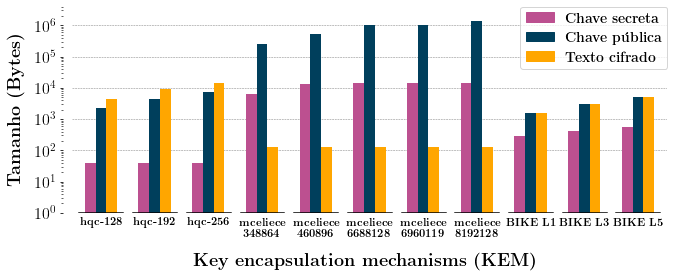

In [13]:
# parameters (sk, pk an ct) plot with logarithmic scale

skvals = [40, 40, 40, 6492, 13608, 13932, 13948, 14120, 281, 418, 580]
pkvals = [2249, 4522, 7245, 261120, 524160, 1044992, 1047319, 1357824, 1540, 3082, 5122]
ctvals = [4481, 9026, 14469, 128, 128, 128, 128, 128, 1575, 3114, 5154]

plt.figure(figsize=(9.5, 4))
ax = plt.subplot(1, 1, 1, frameon=False)

def bars(origin, s, n, index):
    X = (origin * (n + 2)) + np.arange(n)
    H = [skvals[origin], pkvals[origin], ctvals[origin]]

    rects = ax.bar(
        X,
        H,
        width=1.0,
        align="edge",
#         color=[material[color][s] for color in ["red","blue","green"]],
        color=["#bc5090","#003f5c","#ffa600"]
    )
    # bar labels
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, r'\textbf{%d}'%int(h),ha='center',
#                 va='bottom')#, fontsize = 10)
    ax.plot([origin * (n + 2) - 0.5, origin * (n + 2) + n + 0.5], [1, 1], color="black", lw=2.5)
    ax.text(origin * (n + 2) + n / 2, 0.70, index, va="top", ha="center")#, fontsize = 12)

ax.axhline(100, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(1000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(10000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(100000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(1000000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)

# number of group bars
n = 3

# color saturation
s = 3

bars(0, s, n, r'\textbf{hqc-128}')
bars(1, s, n, r'\textbf{hqc-192}')
bars(2, s, n, r'\textbf{hqc-256}')
bars(3, s, n, r'\textbf{mceliece}''\n'r'\textbf{348864}')
bars(4, s, n, r'\textbf{mceliece}''\n'r'\textbf{460896}')
bars(5, s, n, r'\textbf{mceliece}''\n'r'\textbf{6688128}')
bars(6, s, n, r'\textbf{mceliece}''\n'r'\textbf{6960119}')
bars(7, s, n, r'\textbf{mceliece}''\n'r'\textbf{8192128}')
bars(8, s, n, r'\textbf{BIKE L1}')
bars(9, s, n, r'\textbf{BIKE L3}')
bars(10, s, n, r'\textbf{BIKE L5}')

ax.set_xlim(-2, 11.15 * (n + 2) - 1.5)
ax.set_xticks([])
ax.set_ylim((10**0,10**6*4))
ax.set_yscale('log')
plt.yticks(fontsize=16)

plt.legend(
    loc="upper right",
    borderaxespad=0.0,
    ncol=1,
    handles=[
        mpatches.Patch(color="#bc5090", label=r'\textbf{Chave secreta}'),
        mpatches.Patch(color="#003f5c", label=r'\textbf{Chave pública}'),
        mpatches.Patch(color="#ffa600", label=r'\textbf{Texto cifrado}'),
    ],
    fontsize = 14
)

ax.set_xlabel(r'\textbf{Key encapsulation mechanisms (KEM)}', labelpad=40, fontsize = 18)
ax.set_ylabel(r'\textbf{Tamanho (Bytes)}', labelpad=10, fontsize = 18)

plt.tight_layout()
plt.savefig('imgs/parameters.pdf', bbox_inches='tight')
plt.show()

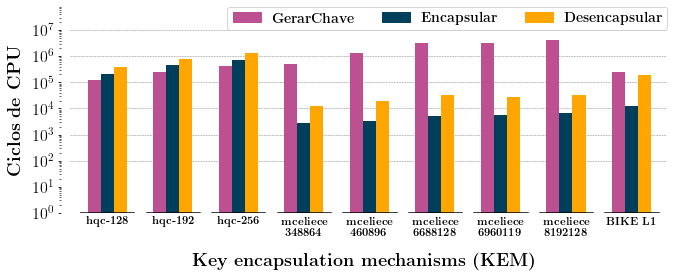

In [14]:
# reference performance in CPU cycles with logarithmic scale

kgenvals = [128000, 259000, 423000, 482893, 1383104, 3346231, 3086064, 4115427, 258750]
encvals = [212000, 442000, 738000, 2720, 3360, 5024, 5413, 6528, 12240]
decvals = [400000, 753000, 1286000, 12036, 18771, 32145, 26617, 33640, 189615]

plt.figure(figsize=(9.5, 4))
ax = plt.subplot(1, 1, 1, frameon=False)

def bars(origin, s, n, index):
    X = (origin * (n + 2)) + np.arange(n)
    H = [kgenvals[origin], encvals[origin], decvals[origin]]

    rects = ax.bar(
        X,
        H,
        width=1.0,
        align="edge",
#         color=[material[color][s] for color in ["red","blue","green"]],
        color=["#bc5090","#003f5c","#ffa600"]
    )
    # bar labels
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, r'\textbf{%d}'%int(h),ha='center',
#                 va='bottom')#, fontsize = 10)
    ax.plot([origin * (n + 2) - 0.5, origin * (n + 2) + n + 0.5], [1, 1], color="black", lw=2.5)
    ax.text(origin * (n + 2) + n / 2, 0.70, index, va="top", ha="center")#, fontsize = 12)

ax.axhline(100, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(1000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(10000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(100000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(1000000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
ax.axhline(10000000, 0.015, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)

# number of group bars
n = 3

# color saturation
s = 3

bars(0, s, n, r'\textbf{hqc-128}')
bars(1, s, n, r'\textbf{hqc-192}')
bars(2, s, n, r'\textbf{hqc-256}')
bars(3, s, n, r'\textbf{mceliece}''\n'r'\textbf{348864}')
bars(4, s, n, r'\textbf{mceliece}''\n'r'\textbf{460896}')
bars(5, s, n, r'\textbf{mceliece}''\n'r'\textbf{6688128}')
bars(6, s, n, r'\textbf{mceliece}''\n'r'\textbf{6960119}')
bars(7, s, n, r'\textbf{mceliece}''\n'r'\textbf{8192128}')
bars(8, s, n, r'\textbf{BIKE L1}')

ax.set_xlim(-2, 9.15 * (n + 2) - 1.5)
ax.set_xticks([])
ax.set_ylim((10**0,10**7*8))
ax.set_yscale('log')
plt.yticks(fontsize=16)

plt.legend(
    loc="upper right",
    borderaxespad=0.0,
    ncol=3,
    handles=[
        mpatches.Patch(color="#bc5090", label=r'\textbf{GerarChave}'),
        mpatches.Patch(color="#003f5c", label=r'\textbf{Encapsular}'),
        mpatches.Patch(color="#ffa600", label=r'\textbf{Desencapsular}'),
    ],
    fontsize = 14
)

ax.set_xlabel(r'\textbf{Key encapsulation mechanisms (KEM)}', labelpad=40, fontsize = 18)
ax.set_ylabel(r'\textbf{Ciclos de CPU}', labelpad=10, fontsize = 18)

plt.tight_layout()
plt.savefig('imgs/performance.pdf', bbox_inches='tight')
plt.show()

## Directory cleanup

In [15]:
# clears directory
os.remove("data.zip")
rmtree("data/")